# Modelos de regresión líneal

## Modelo con datos simulados

### y = a + b * x
### X : 100 valores distribuidos segun una N(1.5, 2.5) Normal
### Ye =  5 + 1.9 * x + e (Y estimada)
### e : estará distribuida según una N(0. 0.8) "una Normal de 'media' 0 y desviación estandar de 0.8"

In [1]:
import numpy as np
import pandas as pd

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [6]:
y_pred = 5 + 1.9 * x

In [8]:
y_act = 5 + 1.9 * x + res

In [9]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [10]:
data = pd.DataFrame(
    {
        'x' : x_list,
        'y_actual' : y_act_list,
        'y_prediccion' : y_pred_list
    }
)

In [11]:
data.head()

,x,y_actual,y_prediccion
0,-2.135893,1.184665,0.941803
1,2.384532,10.237383,9.530610
2,-0.631919,5.522233,3.799353
3,2.943267,10.610181,10.592206
4,-5.115750,-4.107711,-4.719925


In [12]:
import matplotlib.pyplot as plt

In [14]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

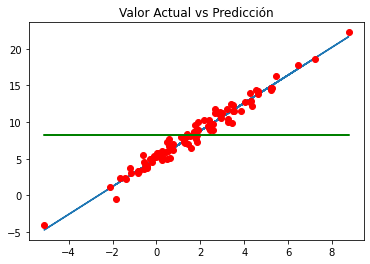

In [15]:
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean, 'g')
plt.title('Valor Actual vs Predicción')

In [18]:
data['SSR'] = (data['y_prediccion']-np.mean(y_act))**2 
data['SSD'] = (data['y_prediccion']-data['y_actual'])**2 
data['SST'] = (data['y_actual']-np.mean(y_act))**2 
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-2.135893,1.184665,0.941803,53.626763,0.058982,50.128767
1,2.384532,10.237383,9.530610,1.602193,0.499529,3.890957
2,-0.631919,5.522233,3.799353,19.940503,2.968314,7.521852
3,2.943267,10.610181,10.592206,5.416670,0.000323,5.500661
4,-5.115750,-4.107711,-4.719925,168.603923,0.374806,153.079834


In [20]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
print(SSR)
print(SSD)
print(SST)

1713.174572033896
52.69488885742273
1742.3145994475794


In [21]:
R2 = SSR / SST
R2

0.9832751057570644

(array([ 5.,  5., 18., 15., 25., 17.,  7.,  5.,  2.,  1.]),
 array([-1.72287962, -1.34279701, -0.9627144 , -0.58263179, -0.20254918,
         0.17753343,  0.55761604,  0.93769865,  1.31778126,  1.69786387,
         2.07794648]),
 <BarContainer object of 10 artists>)

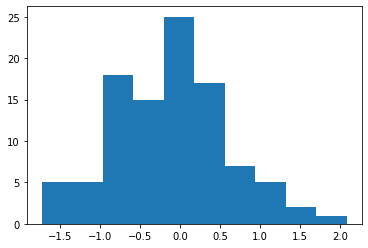

In [22]:
plt.hist(data['y_prediccion']-data['y_actual'])